In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [4]:
folder_path = r'harth' # folder path where all the files are stored
all_files = os.listdir(folder_path) # list of all files in the folder
df_list = [] # list to store all the dataframes
for file in all_files:
    df = pd.read_csv(folder_path + '/' + file) # read the file
    df_list.append(df) 
df = pd.concat(df_list) # concatenate all the dataframes

Μεχρί εδώ ενσωματώσαμε τα δεδομένα μας σε ένα ενιαίο dataframe για να μπορέσουμε να δουλέψουμε ευκολότερα.
Τρέχοντας την εντολή df.describe() λαμβάνουμε μια γενική ιδέα του dataframe αυτού και με το df.count() μπορούμε να δούμε το πλήθος της κάθε στήλης του dataframe μας.

In [5]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index,Unnamed: 0
count,6.042339e+06,6.042339e+06,6.042339e+06,6.042339e+06,6.042339e+06,6.042339e+06,6.042339e+06,720639.000000,137646.000000
mean,-8.825032e-01,-1.695578e-02,-1.584657e-01,-6.130622e-01,1.883215e-02,3.553836e-01,6.792293e+00,195407.155799,68822.500000
std,3.888204e-01,2.369252e-01,3.664447e-01,6.320823e-01,3.974866e-01,7.446800e-01,1.169959e+01,111591.198157,39735.121914
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00,1.000000e+00,0.000000,0.000000
25%,-1.003365e+00,-8.800556e-02,-3.597418e-01,-9.777961e-01,-1.008300e-01,-1.690709e-01,3.000000e+00,100151.000000,34411.250000
50%,-9.751148e-01,4.760000e-04,-1.207953e-01,-4.385440e-01,3.016035e-02,5.671390e-01,7.000000e+00,191640.000000,68822.500000
75%,-8.118676e-01,6.684159e-02,5.539265e-02,-1.935811e-01,1.538403e-01,9.451541e-01,7.000000e+00,285446.000000,103233.750000
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00,1.400000e+02,424173.000000,137645.000000


In [6]:
df.count()

timestamp     6042339
back_x        6042339
back_y        6042339
back_z        6042339
thigh_x       6042339
thigh_y       6042339
thigh_z       6042339
label         6042339
index          720639
Unnamed: 0     137646
dtype: int64

Τρέχοντας τα παρατηρούμε ότι δύο στήλες το έχουν πλήθος δεδομένων μιας τάξης μικρότερο απο τις υπολοιπές οπότε τις ξεσκαρτάρουμε χρησιμοποιώντας την df.drop() και με την df.isna().sum() μετράμε πόσα απο τα δεδομένα στις υπόλοιπες στήλες είναι ΝΑ που θα προσέξουμε ότι είναι 0. Αυτό δεν σημαίνει απαραίτητα ότι όλα τα δεδομένα είναι καθαρά πλέον απλά πραγματοποιήσαμε ένα πρώτο καθαρισμό. Για αυτόν τον λόγο δημιουργούμε ένα νέο csv για να αποθηκεύσουμε το "καθαρό" μας dataframe τοπικά στον υπολογιστή μας.

In [7]:
df.drop(columns=['index', 'Unnamed: 0'], inplace=True)
nan_counts = df.isna().sum()

In [8]:
file_name = 'harth_cleaned.csv'
df.to_csv(file_name, index=False)

Τωρα εξετάζουμε για άλλες μορφες "κακων" δεδομένων όπως π.χ. τι ποσοστο κατέχει το κάθε label. Για υπενθύμιση τα labels σημαινουν : 
1: walking	
2: running	
3: shuffling
4: stairs (ascending)	
5: stairs (descending)	
6: standing	
7: sitting	
8: lying	
13: cycling (sit)	
14: cycling (stand)	
130: cycling (sit, inactive)
140: cycling (stand, inactive)

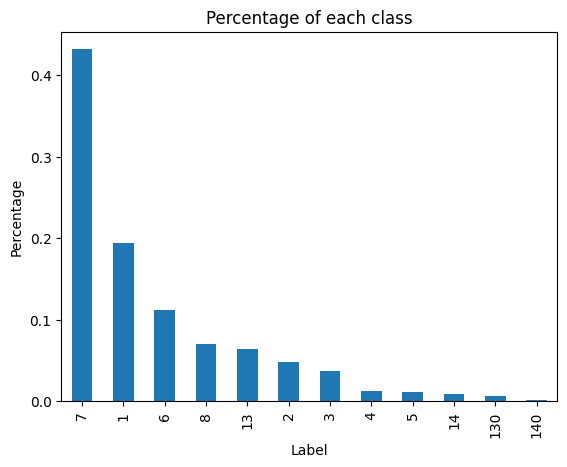

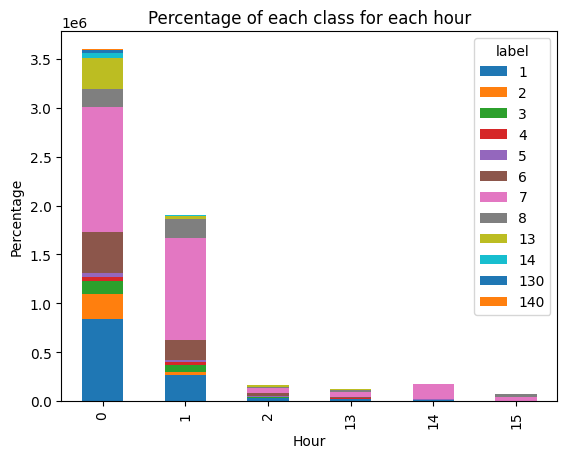

In [9]:
df['label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of each class')
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.show()
#plot me for each hour of the "timestamp" column the count for each label normilized as a percentage of that hour
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df.groupby(['hour', 'label']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Percentage of each class for each hour')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.show()

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the cutoff time
cutoff_time = pd.to_datetime('13:00:00').time()

df.loc[df['timestamp'].dt.time > cutoff_time, 'timestamp'] -= pd.Timedelta(hours=13)

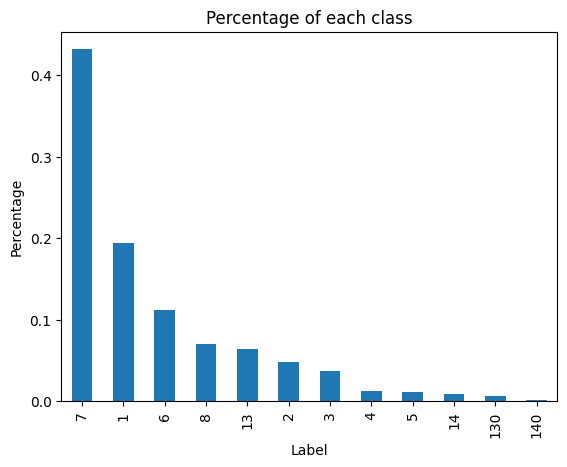

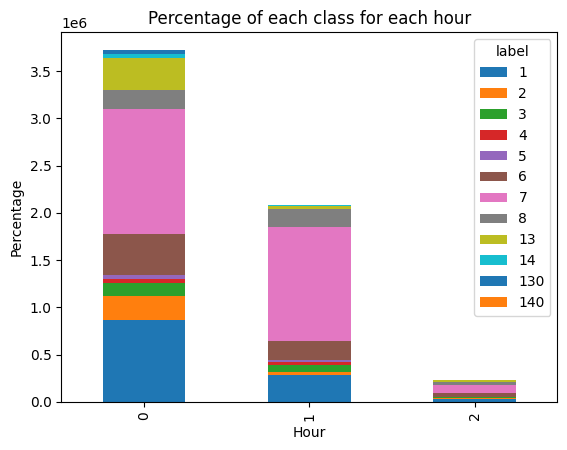

In [13]:
df['label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of each class')
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.show()
#plot me for each hour of the "timestamp" column the count for each label normilized as a percentage of that hour
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df.groupby(['hour', 'label']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Percentage of each class for each hour')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.show()